# Lab 9.5: Working with Pre-trained Word Embeddings — Word2Vec / GloVe

## Objective
This lab explores pre-trained Word Embeddings (Word2Vec / GloVe). We load embeddings, compute similarity, perform analogies, visualize vector relationships, and interpret semantic meaning.

## Step 2 — Import Required Libraries
- **gensim**: To load pre-trained embeddings
- **numpy**: For numerical vector operations
- **pandas**: For structured result display
- **matplotlib**: For visualization
- **sklearn (PCA)**: For dimensionality reduction

In [10]:
!pip install gensim
import numpy as np
import pandas as pd
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Step 3 — Load Pre-trained Embeddings
We load **GloVe (50-dimensional)** vectors using gensim downloader.

In [4]:
# Load pre-trained GloVe model (downloads first time)
model = api.load("glove-wiki-gigaword-50")

print("Vocabulary Size:", len(model.key_to_index))
print("\nExample vector for 'king':\n", model['king'])

[==================================================] 100.0% 66.0/66.0MB downloaded
Vocabulary Size: 400000

Example vector for 'king':
 [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


Each number in the vector represents a learned semantic feature dimension. These values capture contextual meaning from large text corpora.

## Selected Words (Across Themes)
Sports, Education, Technology, Locations, Emotions

In [5]:
words = [
# Sports
"cricket","football","tennis","player","stadium","coach",
# Education
"teacher","student","school","university","exam","library",
# Technology
"computer","software","hardware","internet","technology","ai",
# Locations
"india","france","paris","london","city","village",
# Emotions
"happy","sad","angry","joy","love","fear"
]

print("Total Selected Words:", len(words))

Total Selected Words: 30


These words cover multiple themes to analyze semantic clustering and contextual relationships in embedding space.

## Step 4 — Word Similarity (Cosine Similarity)

In [6]:
pairs = [
("doctor","nurse"),
("cat","dog"),
("car","bus"),
("king","queen"),
("happy","sad"),
("teacher","student"),
("paris","france"),
("cricket","football"),
("computer","technology"),
("city","village")
]

for w1, w2 in pairs:
    print(f"{w1} - {w2} :", model.similarity(w1, w2))

doctor - nurse : 0.79774976
cat - dog : 0.9218005
car - bus : 0.8210511
king - queen : 0.7839043
happy - sad : 0.6890632
teacher - student : 0.8962056
paris - france : 0.802533
cricket - football : 0.69603723
computer - technology : 0.8525559
city - village : 0.7453269


Higher cosine similarity value indicates that words are semantically closer.

## Step 5 — Nearest Neighbor Exploration

In [7]:
for word in ["king","university","computer","happy","india"]:
    print(f"\nTop 5 words similar to '{word}':")
    print(model.most_similar(word, topn=5))


Top 5 words similar to 'king':
[('prince', 0.8236179351806641), ('queen', 0.7839043140411377), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.766719400882721)]

Top 5 words similar to 'university':
[('college', 0.874463677406311), ('harvard', 0.8710561394691467), ('yale', 0.8566808104515076), ('graduate', 0.8552882671356201), ('institute', 0.8483645915985107)]

Top 5 words similar to 'computer':
[('computers', 0.9165045022964478), ('software', 0.8814992904663086), ('technology', 0.852556049823761), ('electronic', 0.812586784362793), ('internet', 0.8060455322265625)]

Top 5 words similar to 'happy':
[("'m", 0.9142323136329651), ('everyone', 0.8976402282714844), ('everybody', 0.8965489864349365), ('really', 0.88397616147995), ('me', 0.8784631490707397)]

Top 5 words similar to 'india':
[('indian', 0.8648794293403625), ('pakistan', 0.8529723286628723), ('malaysia', 0.816650927066803), ('bangladesh', 0.8154239058494568), ('delhi', 0.8142766356468201)]


## Step 6 — Word Analogy Tasks

In [8]:
print("king - man + woman =",
      model.most_similar(positive=['king','woman'], negative=['man'], topn=1))

print("paris - france + india =",
      model.most_similar(positive=['paris','india'], negative=['france'], topn=1))

print("teacher - school + hospital =",
      model.most_similar(positive=['teacher','hospital'], negative=['school'], topn=1))

king - man + woman = [('queen', 0.8523604273796082)]
paris - france + india = [('delhi', 0.8888585567474365)]
teacher - school + hospital = [('nurse', 0.8027187585830688)]


Word embeddings solve analogies using vector arithmetic. Relationships between words are represented as vector differences.

## Step 7 — Visualization using PCA

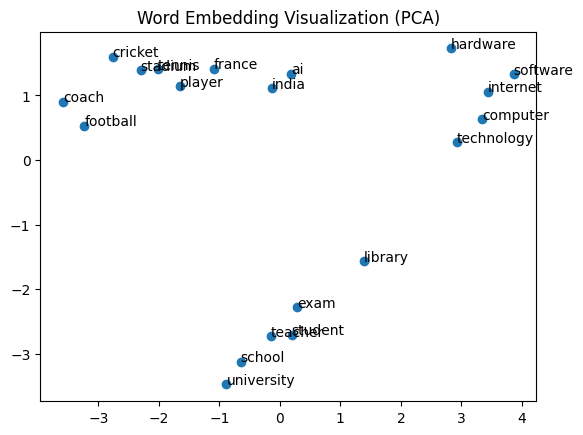

In [9]:
selected = words[:20]
vectors = np.array([model[word] for word in selected])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure()
plt.scatter(reduced[:,0], reduced[:,1])

for i, word in enumerate(selected):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))

plt.title("Word Embedding Visualization (PCA)")
plt.show()

## Step 8 — Reflection and Interpretation
Word embeddings learn contextual meaning by placing similar words close together in vector space. Cosine similarity effectively measures semantic closeness. Sports words cluster together, education words form another cluster, and technology words form another group. Analogies work because similar relationships produce similar vector offsets. However, embeddings may fail when words are ambiguous. They also inherit bias from training data. Context strongly influences vector position. Overall, embeddings capture meaningful semantic structure.